<div id="container" style="position:relative;">
<div style="float:left"><h1>Capstone: Exploring Spotify Dataset </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>






### Eloyn Vazquez.



## Content:

#### Introducction.

Part 1 - Basic Analysis


Part 2 - Data Cleaning

Part 3 - EDA




 ## Spotify's Score: Measuring What Makes Music Popular
  
  
### Introduction


In the digital age, music streaming platforms have become the arbiters of musical trends and tastes, with Spotify leading the charge as a premier destination for over 345 million active users seeking sonic solace, invigorating beats, and everything in between. At the heart of Spotify's influence lies a seemingly simple yet enigmatic measure: the song popularity score. This metric, a blend of art and algorithm, is the pulse by which the platform's recommendation engine beats, influencing what millions choose to listen to daily.

This study dives into the depths of Spotify's vast musical repository to understand the nuanced factors that contribute to a song's popularity score. We embark on a quest not just to quantify the echoes of a track's success but to understand the symphony of elements—ranging from play counts and user engagement to temporal trends and artist influence—that harmonize to position a track on Spotify's global stage.

Our exploration is underpinned by the hypothesis that a song's popularity is not a serendipitous phenomenon but a complex interplay of artist visibility, genre resonance, and cultural zeitgeist, all captured in real-time through Spotify's data-driven lens. By dissecting the constituent components of the Spotify score, we aim to offer musicians, producers, and industry executives a compass to navigate the vast seas of digital sound waves.

Through rigorous data analysis and machine learning models, we seek to uncover patterns and predictors of popularity, offering a roadmap to viral success. The insights gleaned will serve as a beacon for upcoming artists and established names alike, illuminating the path to acoustical acclaim and streaming supremacy in Spotify's digital dominion.










  
----------

### Data Dictionary






In [1]:
import pandas as pd

# Define the data dictionary as a list of dictionaries
data_dictionary = [
    {"Column Name": "popularity", "Data Type": "Integer", "Description": "The popularity index of the song on Spotify, where a higher score indicates higher popularity. Scores range from 0 to 100."},
    {"Column Name": "artists", "Data Type": "List", "Description": "A list of artists who performed or contributed to the song. This can include solo artists, bands, or collaborations."},
    {"Column Name": "first_artist", "Data Type": "String", "Description": "The name of the first artist listed in the 'artists' column, presumed to be the primary or leading artist for the track."},
    {"Column Name": "first_artist_song_count", "Data Type": "Integer", "Description": "The total number of songs in the dataset where the 'first_artist' is listed as a contributor."},
    {"Column Name": "artist_count", "Data Type": "Integer", "Description": "The number of unique artists associated with each song, indicating the level of collaboration."},
    {"Column Name": "duration_ms", "Data Type": "Integer", "Description": "The duration of the song in milliseconds."},
    {"Column Name": "explicit", "Data Type": "Boolean", "Description": "A binary indicator of whether a song has explicit content (1 for explicit, 0 for non-explicit)."},
    {"Column Name": "key", "Data Type": "Integer", "Description": "The key the song is in, represented as an integer between 0 and 11, corresponding to pitches in the chromatic scale."},
    {"Column Name": "mode", "Data Type": "Integer", "Description": "The modality of the song, where 1 represents a major key and 0 represents a minor key."},
    {"Column Name": "acousticness", "Data Type": "Float", "Description": "A confidence measure from 0.0 to 1.0 of whether the track is acoustic, with 1.0 representing high confidence the track is acoustic."},
    {"Column Name": "danceability", "Data Type": "Float", "Description": "A measure from 0.0 to 1.0 of how suitable a track is for dancing based on tempo, rhythm stability, beat strength, and overall regularity."},
    {"Column Name": "energy", "Data Type": "Float", "Description": "A measure from 0.0 to 1.0 that represents a perceptual measure of intensity and activity."},
    {"Column Name": "instrumentalness", "Data Type": "Float", "Description": "Predicts whether a track contains no vocals. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0."},
    {"Column Name": "liveness", "Data Type": "Float", "Description": "Detects the presence of an audience in the recording; a higher liveness value indicates a higher probability that the song was performed live."},
    {"Column Name": "loudness", "Data Type": "Float", "Description": "The overall loudness of a track in decibels (dB), typically ranging between -60 and 0 db."},
    {"Column Name": "speechiness", "Data Type": "Float", "Description": "Measures the presence of spoken words in a track; a higher value signifies more spoken word content (e.g., talk shows, audio books, poetry)."},
    {"Column Name": "tempo", "Data Type": "Float", "Description": "The overall estimated tempo of a track in beats per minute (BPM)."},
    {"Column Name": "valence", "Data Type": "Float", "Description": "A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track; tracks with high valence sound more positive and happy."},
   
]

# Convert the list of dictionaries into a DataFrame
data_dictionary_df = pd.DataFrame(data_dictionary)

# Display the data dictionary DataFrame
print(data_dictionary_df)


                Column Name Data Type  \
0                popularity   Integer   
1                   artists      List   
2              first_artist    String   
3   first_artist_song_count   Integer   
4              artist_count   Integer   
5               duration_ms   Integer   
6                  explicit   Boolean   
7                       key   Integer   
8                      mode   Integer   
9              acousticness     Float   
10             danceability     Float   
11                   energy     Float   
12         instrumentalness     Float   
13                 liveness     Float   
14                 loudness     Float   
15              speechiness     Float   
16                    tempo     Float   
17                  valence     Float   

                                          Description  
0   The popularity index of the song on Spotify, w...  
1   A list of artists who performed or contributed...  
2   The name of the first artist listed in the 'ar..

------
 ### Loading and Setup




In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
# Filter warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:
# 'print' everytime we want to display the output.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
#Load the dataset 
df = pd.read_csv('spotify-dataset-19212020-160k-tracks.csv')

In [5]:
# Display df / Sanity check
df

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,1928,0.9950,0.708,0.1950,0.563000,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,1928,0.9940,0.379,0.0135,0.901000,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,1928,0.6040,0.749,0.2200,0.000000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,9/25/28,1928,0.9950,0.781,0.1300,0.887000,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0
4,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",687733,1928,1928,0.9900,0.210,0.2040,0.908000,0.0980,-16.829,0.0424,62.149,0.0693,1,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,4KppkflX7I3vJQk7urOJaS,Skechers (feat. Tyga) - Remix,"['DripReport', 'Tyga']",163800,5/15/20,2020,0.1730,0.875,0.4430,0.000032,0.0891,-7.461,0.1430,100.012,0.3060,1,1,75,1
169905,1ehhGlTvjtHo2e4xJFB0SZ,Sweeter (feat. Terrace Martin),"['Leon Bridges', 'Terrace Martin']",167468,2006-08-20,2020,0.0167,0.719,0.3850,0.031300,0.1110,-10.907,0.0403,128.000,0.2700,1,8,64,0
169906,52eycxprLhK3lPcRLbQiVk,How Would I Know,"['Kygo', 'Oh Wonder']",180700,5/29/20,2020,0.5380,0.514,0.5390,0.002330,0.1080,-9.332,0.1050,123.700,0.1530,1,7,70,0
169907,3wYOGJYD31sLRmBgCvWxa4,I Found You,"['Cash Cash', 'Andy Grammer']",167308,2/28/20,2020,0.0714,0.646,0.7610,0.000000,0.2220,-2.557,0.0385,129.916,0.4720,1,1,70,0


In [6]:
 # Get the shape of our dataset.
df.shape

(169909, 19)

In [7]:
#checking for null values
df.isnull().sum()

id                  0
name                0
artists             0
duration_ms         0
release_date        0
year                0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
mode                0
key                 0
popularity          0
explicit            0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                169909 non-null  object 
 1   name              169909 non-null  object 
 2   artists           169909 non-null  object 
 3   duration_ms       169909 non-null  int64  
 4   release_date      169909 non-null  object 
 5   year              169909 non-null  int64  
 6   acousticness      169909 non-null  float64
 7   danceability      169909 non-null  float64
 8   energy            169909 non-null  float64
 9   instrumentalness  169909 non-null  float64
 10  liveness          169909 non-null  float64
 11  loudness          169909 non-null  float64
 12  speechiness       169909 non-null  float64
 13  tempo             169909 non-null  float64
 14  valence           169909 non-null  float64
 15  mode              169909 non-null  int64  
 16  key               16

**`Finding`** 

Presently, there are **169909** rows and **19** cloumns in our raw dataset. 

#### Moving forward

We will do a **deep dive** into our dataset and get ourselves familiar with all the columns. As we are empowering ourselves with that knowledge, we will decide which rows and columns are necessary for our analysis and start dropping the rest. By doing this, we will transform our raw data into cleaner and usable dataset to deploy our machine learning models in. 

## Feature Overview <a class="anchor" id="overview"></a>
---

We will start with looking at all the **features** (also called attributes) in our dataset and understanding what kind of information they hold. 


#### Attributes:
- **id**: Unique identifier for the track on Spotify.
- **name**: Name of the track.
- **artists**: Artist(s) who performed the track.
- **duration_ms**: Duration of the track in milliseconds.
- **release_date**: Date when the track was released.
- **year**: Year of the track's release.
- **acousticness**: Measure of acoustic quality of the track (0 to 1).
- **danceability**: Measure of how suitable the track is for dancing (0 to 1).
- **energy**: Measure of intensity and activity of the track (0 to 1).
- **instrumentalness**: Indicates likelihood of the track having no vocals (0 to 1).
- **liveness**: Detects presence of an audience in the recording (higher values indicate live performance).
- **loudness**: Overall loudness of the track in decibels (dB).
- **speechiness**: Presence of spoken words in the track (higher values indicate more spoken word content).
- **tempo**: Estimated overall tempo of the track in beats per minute (BPM).
- **valence**: Measure of musical positiveness conveyed by the track (0 to 1).
- **mode**: Modality of the track (1 = major, 0 = minor).
- **key**: Key of the track, represented by integers using Pitch Class notation.
- **popularity**: Measure of the track's popularity on Spotify (0 to 100).
- **explicit**: Indicates whether the track has explicit lyrics (1 = yes, 0 = no).





## Understanding our Data <a class="anchor" id="understanding"></a>

In [9]:
# Display the first 5  rows of the dataframe (df) to get an overview  
df.head()

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,1928,0.995,0.708,0.1950,0.563,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,1928,0.994,0.379,0.0135,0.901,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,1928,0.604,0.749,0.2200,0.000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,9/25/28,1928,0.995,0.781,0.1300,0.887,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0
4,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",687733,1928,1928,0.990,0.210,0.2040,0.908,0.0980,-16.829,0.0424,62.149,0.0693,1,11,1,0


In [10]:
# Display the last 5 rows of the dataframe to get an overview
df.tail()

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
169904,4KppkflX7I3vJQk7urOJaS,Skechers (feat. Tyga) - Remix,"['DripReport', 'Tyga']",163800,5/15/20,2020,0.1730,0.875,0.443,0.000032,0.0891,-7.461,0.1430,100.012,0.306,1,1,75,1
169905,1ehhGlTvjtHo2e4xJFB0SZ,Sweeter (feat. Terrace Martin),"['Leon Bridges', 'Terrace Martin']",167468,2006-08-20,2020,0.0167,0.719,0.385,0.031300,0.1110,-10.907,0.0403,128.000,0.270,1,8,64,0
169906,52eycxprLhK3lPcRLbQiVk,How Would I Know,"['Kygo', 'Oh Wonder']",180700,5/29/20,2020,0.5380,0.514,0.539,0.002330,0.1080,-9.332,0.1050,123.700,0.153,1,7,70,0
169907,3wYOGJYD31sLRmBgCvWxa4,I Found You,"['Cash Cash', 'Andy Grammer']",167308,2/28/20,2020,0.0714,0.646,0.761,0.000000,0.2220,-2.557,0.0385,129.916,0.472,1,1,70,0
169908,60RFlt48hm0l4Fu0JoccOl,More Hearts Than Mine,['Ingrid Andress'],214787,3/27/20,2020,0.1090,0.512,0.428,0.000000,0.1050,-7.387,0.0271,80.588,0.366,1,0,65,0


In [11]:
# Randomly sample 15 rows from the dataframe
df.sample(15)

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
110700,1ntmwjeQ39N5p5PT6zCKL4,Home,['The Ventures'],138240,1/1/60,1960,0.930000,0.654,0.2970,0.780000,0.1510,-16.081,0.0392,113.415,0.569,1,0,21,0
34930,2KIcTuLUn1BZxRBeGOTWPe,My Love Is Your Love (Forever),['Smokey Robinson & The Miracles'],141773,8/29/67,1967,0.242000,0.501,0.4940,0.000000,0.1390,-10.177,0.0401,78.031,0.769,1,1,21,0
147783,2hfjGsWCj47bdpE6oJuUL7,Albert's Shuffle,"['Al Kooper', 'Mike Bloomfield']",413800,1968,1968,0.087000,0.452,0.6130,0.712000,0.5650,-7.862,0.0267,98.149,0.659,1,0,30,0
117751,1VF89Fqi5LX0f3zdqMygrQ,"Von der Renaissance bis heute, Kapitel 42","['Ernst H. Gombrich', 'Christoph Waltz']",321587,1936,1936,0.290000,0.686,0.3650,0.000001,0.1990,-18.427,0.9440,101.822,0.701,0,3,12,0
138023,43nAwASZ7AZMWzfGyCnY48,"Baby, Won't You Please Come Home","['Louis Prima', 'Sam Butera & The Witnesses', ...",125840,1957,1957,0.375000,0.742,0.2090,0.000000,0.1250,-13.357,0.0924,102.509,0.722,1,3,18,0
100484,4SQMJJWvTio8aBcrZUpdIV,Without A Love To Call My Own,['June Carter Cash'],179267,1952,1952,0.941000,0.583,0.0621,0.001190,0.1230,-18.466,0.0388,105.144,0.369,1,7,5,0
122162,1Ym7220l4W7Yz7Yt26rWSr,Rapid Fire,['Judas Priest'],248000,1980,1980,0.000267,0.375,0.9940,0.000750,0.3160,-5.829,0.0902,135.431,0.259,1,2,44,0
145306,3hRRWKbnbqfn0j4pAb6bsn,Lusingame - Instrument and base Version,['Orchestra Studio 7'],217861,11/13/42,1942,0.649000,0.580,0.2060,0.132000,0.1920,-18.449,0.0266,81.942,0.620,1,0,0,0
50232,2tfY5A60urfzfAvlfTHQQ2,"Don't Go Out Into The Rain, You're Going To Melt","[""Herman's Hermits""]",132707,1/1/66,1966,0.013200,0.454,0.6180,0.000000,0.0729,-8.225,0.0255,82.102,0.748,1,4,14,0
104407,6f4jjw4xqdX00zqaJ141PZ,Me Sacaron Del Tenampa,['Cornelio Reyna'],114370,12/19/91,1991,0.620000,0.818,0.4580,0.000000,0.0972,-4.335,0.0662,123.014,0.964,1,5,52,0


In [12]:
# Display the data types of the dataset
df.dtypes

id                   object
name                 object
artists              object
duration_ms           int64
release_date         object
year                  int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
mode                  int64
key                   int64
popularity            int64
explicit              int64
dtype: object

In [13]:
# Check to see if there are any 'NaN' values.
df.isnull().sum()

id                  0
name                0
artists             0
duration_ms         0
release_date        0
year                0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
mode                0
key                 0
popularity          0
explicit            0
dtype: int64

There are **No NaN Values** in our dataset. Super clean dataset

In [14]:
# Check for duplicate rows
df.duplicated().sum()

0

There are **No duplicated rows** in our dataset.

In [15]:
# Check the number of unique values in each column
df.nunique()

id                  169909
name                132939
artists              33375
duration_ms          50212
release_date         10882
year                   100
acousticness          4714
danceability          1232
energy                2332
instrumentalness      5401
liveness              1741
loudness             25313
speechiness           1628
tempo                84548
valence               1739
mode                     2
key                     12
popularity             100
explicit                 2
dtype: int64


### Spotify Dataset Unique Values Interpretation:

#### High Cardinality:
- **id** (169909 unique values): Unique identifier for each song, ideal for indexing.
- **name** (132939 unique values): Reflects a wide range of song titles, indicating diverse content.
- **artists** (33375 unique values): Demonstrates the diversity of artists in the dataset.

#### Numeric Variables with Wide Range:
- **duration_ms** (50212 unique values): Shows a wide variety of song lengths.
- **release_date** (10882 unique values): Useful for temporal analysis due to diverse release dates.
- **year** (100 unique values): Provides a broad historical perspective on music trends.
- **loudness** (25313 unique values): Indicates a wide dynamic range across tracks.
- **tempo** (84548 unique values): High variability in song tempos.

#### Less Varied Numeric Variables:
- **acousticness** (4714 unique values): Useful for acoustic analysis of tracks.
- **danceability** (1232 unique values): Reflects varying levels of danceability in songs.
- **energy** (2332 unique values): Shows diversity in the energy level of tracks.
- **instrumentalness** (5401 unique values): Varies in instrumental content across tracks.
- **liveness** (1741 unique values): Range of live performance presence in recordings.
- **speechiness** (1628 unique values): Variation in spoken word content in songs.
- **valence** (1739 unique values): Indicates a range of emotional content.

#### Binary and Small Range Categorical Variables:
- **mode** (2 unique values): Binary variable for major or minor tonality.
- **explicit** (2 unique values): Binary variable for explicit content.
- **key** (12 unique values): Reflects the 12 musical keys.

#### Uniformly Distributed Variable:
- **popularity** (100 unique values): Even distribution from 0 to 100, indicating song popularity.

### Summary:
- The dataset offers a comprehensive view of music tracks, covering a wide range of characteristics from basic identifiers to complex musical features.
- High cardinality in identifiers suggests a large and diverse song collection.
- Numeric variables provide insights into physical and perceptual aspects of music.
- Binary and small range variables are useful for specific musical analysis.
- The popularity metric offers a broad perspective on track reception and success.



In [16]:
# Generate a copy of our original dataset
spotify= df.copy()

In [17]:
# Sanity check
spotify.head()

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,1928,0.995,0.708,0.1950,0.563,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,1928,0.994,0.379,0.0135,0.901,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,1928,0.604,0.749,0.2200,0.000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,9/25/28,1928,0.995,0.781,0.1300,0.887,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0
4,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",687733,1928,1928,0.990,0.210,0.2040,0.908,0.0980,-16.829,0.0424,62.149,0.0693,1,11,1,0


#### We have successfully made a copy of our dataset called 'spotify'. We will be using this for now onwards.  

## Handling Features <a class="anchor" id="handling"></a>
---

In [18]:
spotify.groupby('artists').size().reset_index()

,artists,0
0,"[""'In The Heights' Original Broadway Company"",...",1
1,"[""'In The Heights' Original Broadway Company""]",2
2,"[""'Legally Blonde' Ensemble"", 'Michael Rupert'...",1
3,"[""'Legally Blonde' Ensemble"", 'Michael Rupert']",1
4,"[""'Til Tuesday""]",8
...,...,...
33370,['黃品源'],1
33371,"['黃國隆', '王秋玉']",1
33372,['黃國隆'],5
33373,['黃蜀娟'],21


In [19]:


# we extracted the first artist from each list in the 'artists' column
df['first_artist'] = df['artists'].apply(lambda x: x.split(',')[0] if x else None)

# Count how many times each first artist appears
first_artist_counts = df['first_artist'].value_counts().to_dict()

# We created a new column to store this count for each song
df['first_artist_song_count'] = df['first_artist'].map(first_artist_counts)

spotify = df.copy()


In [20]:
# Group by 'first_artist' and sum the 'first_artist_song_count' for each artist
total_songs_per_artist = spotify.groupby('first_artist')['first_artist_song_count'].sum().reset_index(name='total_songs_per_first_artist')

# Merge this aggregate data with the original spotify DataFrame
spotify = spotify.merge(total_songs_per_artist, on='first_artist', how='left')


In [21]:
# Sanity check
spotify.head()

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,...,speechiness,tempo,valence,mode,key,popularity,explicit,first_artist,first_artist_song_count,total_songs_per_first_artist
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,1928,0.995,0.708,0.1950,0.563,...,0.0506,118.469,0.7790,1,10,0,0,['Carl Woitschach'],21,441
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,1928,0.994,0.379,0.0135,0.901,...,0.0462,83.972,0.0767,1,8,0,0,['Robert Schumann',253,64009
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,1928,0.604,0.749,0.2200,0.000,...,0.9290,107.177,0.8800,0,5,0,0,['Seweryn Goszczyński'],76,5776
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,9/25/28,1928,0.995,0.781,0.1300,0.887,...,0.0926,108.003,0.7200,0,1,0,0,['Francisco Canaro'],938,879844
4,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",687733,1928,1928,0.990,0.210,0.2040,0.908,...,0.0424,62.149,0.0693,1,11,1,0,['Frédéric Chopin',1033,1067089


here is copy data frame named spotify with the 3 new colums that gonna be helpfull to have them for our target variable popularity

In [22]:
# Sanity check
spotify.head()
df.nunique()

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,...,speechiness,tempo,valence,mode,key,popularity,explicit,first_artist,first_artist_song_count,total_songs_per_first_artist
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,1928,0.995,0.708,0.1950,0.563,...,0.0506,118.469,0.7790,1,10,0,0,['Carl Woitschach'],21,441
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,1928,0.994,0.379,0.0135,0.901,...,0.0462,83.972,0.0767,1,8,0,0,['Robert Schumann',253,64009
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,1928,0.604,0.749,0.2200,0.000,...,0.9290,107.177,0.8800,0,5,0,0,['Seweryn Goszczyński'],76,5776
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,9/25/28,1928,0.995,0.781,0.1300,0.887,...,0.0926,108.003,0.7200,0,1,0,0,['Francisco Canaro'],938,879844
4,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",687733,1928,1928,0.990,0.210,0.2040,0.908,...,0.0424,62.149,0.0693,1,11,1,0,['Frédéric Chopin',1033,1067089


id                         169909
name                       132939
artists                     33375
duration_ms                 50212
release_date                10882
year                          100
acousticness                 4714
danceability                 1232
energy                       2332
instrumentalness             5401
liveness                     1741
loudness                    25313
speechiness                  1628
tempo                       84548
valence                      1739
mode                            2
key                            12
popularity                    100
explicit                        2
first_artist                22769
first_artist_song_count       220
dtype: int64

---

### Target variable:

- Popularity


### Feature Names in the Spotify DataFrame
- **id**
- **name**
- **duration_ms**
- **release_date**
- **year**
- **acousticness**
- **danceability**
- **energy**
- **instrumentalness**
- **liveness**
- **loudness**
- **speechiness**
- **tempo**
- **valence**
- **mode**
- **key**
- **popularity**
- **explicit**
- **first_artist_song_count**
- **first_artist**

#### We will be using all the remaining features/attributes to make a machine learning model to predict popularity songs**

In [23]:
#summary
spotify.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_ms,169909.0,231406.158973,121321.923219,5108.0,171040.0000,208600.000000,262960.0000,5403500.000
year,169909.0,1977.223231,25.593168,1921.0,1957.0000,1978.000000,1999.0000,2020.000
acousticness,169909.0,0.493214,0.376627,0.0,0.0945,0.492000,0.8880,0.996
danceability,169909.0,0.538150,0.175346,0.0,0.4170,0.548000,0.6670,0.988
energy,169909.0,0.488593,0.267390,0.0,0.2630,0.481000,0.7100,1.000
instrumentalness,169909.0,0.161937,0.309329,0.0,0.0000,0.000204,0.0868,1.000
liveness,169909.0,0.206690,0.176796,0.0,0.0984,0.135000,0.2630,1.000
loudness,169909.0,-11.370289,5.666765,-60.0,-14.4700,-10.474000,-7.1180,3.855
speechiness,169909.0,0.094058,0.149937,0.0,0.0349,0.045000,0.0754,0.969
tempo,169909.0,116.948017,30.726937,0.0,93.5160,114.778000,135.7120,244.091


In [24]:
spotify.shape

(169909, 22)

#### After cleaning our dataset, we have **169909** rows and **18** columns to work with.<br>
---

### To conclude, following are the steps we used for data cleaning:

**1.** First, we imported all the necessary libraries to work with our data.<br>
**2.** Then, we loaded our dataset.<br>
**3.** Got an overview of how our data looks (shape, columns, datatypes, info).<br>
**4.** Checked for missing ('NaN') values, .<br>
**5.** Defined our attributes and target variable.<br> 





-----
## Exploratory Data Analysis (EDA) <a class="anchor" id="eda"></a>
---

We will start with our Exploratory Data Analysis (EDA) to look for any patterns, anomalies, and critical insights within our data. We will check for any relationships between our variables, visualize dependencies and modify our data according to those correlations. 

Let's find out the correlation coefficient of our numeric variables. 

In [25]:
# Selecting all the numeric coluns.
numerical_columns= spotify.select_dtypes(include=['int64', 'float64'])
print(numerical_columns.head())

   duration_ms  year  acousticness  danceability  energy  instrumentalness  \
0       158648  1928         0.995         0.708  0.1950             0.563   
1       282133  1928         0.994         0.379  0.0135             0.901   
2       104300  1928         0.604         0.749  0.2200             0.000   
3       180760  1928         0.995         0.781  0.1300             0.887   
4       687733  1928         0.990         0.210  0.2040             0.908   

   liveness  loudness  speechiness    tempo  valence  mode  key  popularity  \
0    0.1510   -12.428       0.0506  118.469   0.7790     1   10           0   
1    0.0763   -28.454       0.0462   83.972   0.0767     1    8           0   
2    0.1190   -19.924       0.9290  107.177   0.8800     0    5           0   
3    0.1110   -14.734       0.0926  108.003   0.7200     0    1           0   
4    0.0980   -16.829       0.0424   62.149   0.0693     1   11           1   

   explicit  first_artist_song_count  total_songs_per_fi

In [26]:
numerical_columns = spotify.select_dtypes(include=[np.number]).columns.tolist()

# 'numerical_columns' now contains the names of all numerical columns in your DataFrame
print(numerical_columns)

['duration_ms', 'year', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode', 'key', 'popularity', 'explicit', 'first_artist_song_count', 'total_songs_per_first_artist']


<Figure size 1000x800 with 0 Axes>

<Axes: >

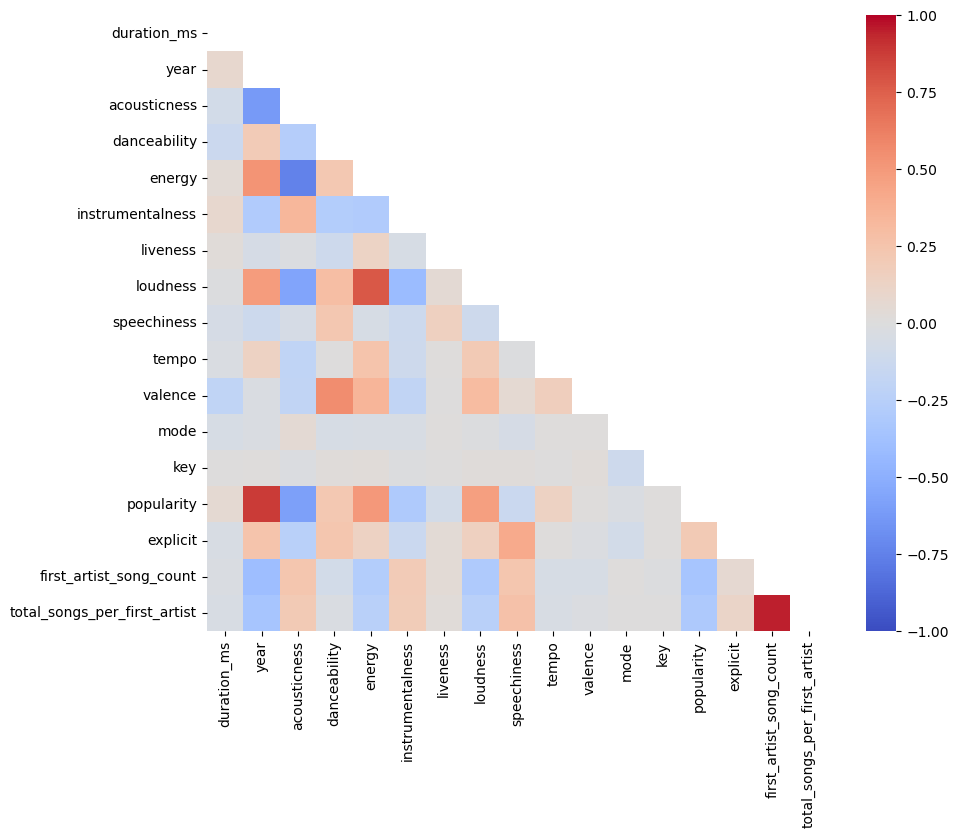

In [27]:

correlation_matrix =spotify[numerical_columns].corr()

# Create a mask for the upper triangle
mask = np.triu(correlation_matrix)

# Set the size of the heatmap
plt.figure(figsize=(10,8))

# Create the heatmap with the correlation matrix
sns.heatmap(correlation_matrix.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask, fmt=".2f")

# Display the heatmap
plt.show()


#### Interpretation

Certain features such as **danceability, energy, and valence** appear to have a moderate positive correlation with the popularity of a track, suggesting that tracks that are more danceable, more energetic, and have a happier mood might tend to be more popular.


**Acousticness** shows a **negative correlation** with energy, which is consistent with the notion that acoustic tracks tend to be less energetic.

**Loudness and energy** also appear to be positively correlated, which aligns with the understanding that louder songs are often perceived as more energetic.


**Instrumentalness** seems to have a very low correlation with popularity, indicating that the presence of vocal content might not be a strong indicator of a song's popularity within this dataset.
Liveness has a low to moderate negative correlation with popularity, which could suggest that studio recordings are generally more popular than live performances on Spotify.


The number of **songs by an artist (song_count)** does not show a strong correlation with popularity, implying that an artist's catalog size is not a significant factor in the popularity of individual songs in this dataset.


It is important to note that while correlation can provide insights into potential relationships between variables, it does not imply causation, and further analysis would be necessary to understand the underlying factors that influence the popularity of songs on Spotify. Additionally, correlation analysis does not account for the effect of confounding variables which might influence these relationships.

---

### 1. Popularity

First, we will look at our **"Popularity"** column which is our **Target variable**, this is what we're trying to predict with our upcoming Machine Learning model. 

In [28]:
# Get description of this column
spotify.popularity.describe().apply(lambda x: format(x, 'f'))

count    169909.000000
mean         31.556610
std          21.582614
min           0.000000
25%          12.000000
50%          33.000000
75%          48.000000
max         100.000000
Name: popularity, dtype: object

**`Finding:`**  In the dataset, the highest positive correlation observed is between the 'danceability' and 'energy' features, suggesting that songs which are more danceable also tend to be more energetic. Additionally, 'loudness' and 'energy' show a strong positive relationship, indicating that louder songs are often more dynamic.

To further explore these relationships and how they might influence a song's popularity, we'll visualize the data and perform more in-depth analysi

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='popularity'>

Text(0.5, 1.0, 'Distribution of popularity')

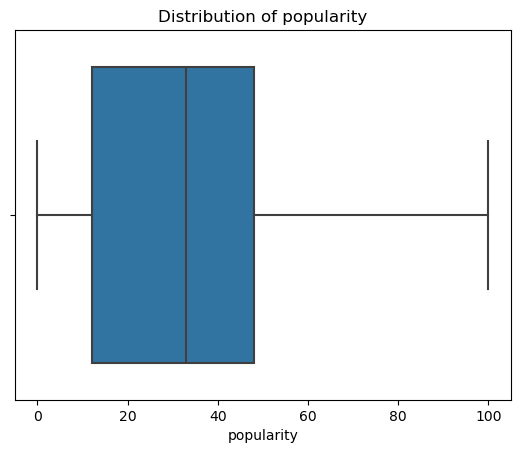

In [29]:
# Create the box plot
plt.figure()
sns.boxplot(x="popularity", data=spotify)
plt.title("Distribution of popularity")

plt.show()

##### Interpretetion
The box plot indicates that popularity scores in the dataset are moderately spread, with a median slightly above 40. Most tracks have popularity scores within a narrow range, as shown by the compact box, with no extreme outliers visible. The data appears to be skewed towards lower popularity scores.
 

<Axes: xlabel='popularity', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of popularity Scores')

Text(0.5, 0, 'popularity')

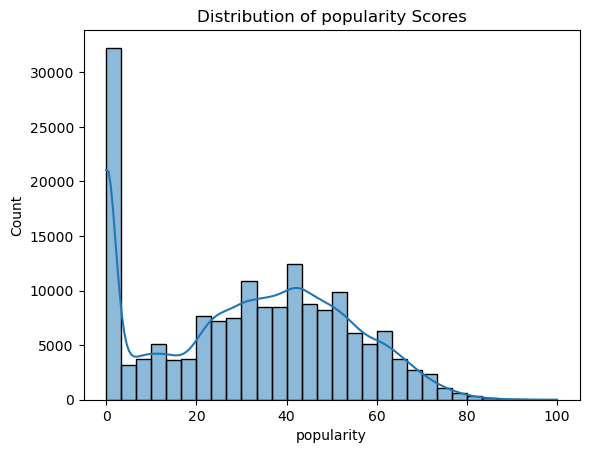

In [30]:
sns.histplot(spotify['popularity'], bins=30, kde=True)
plt.title('Distribution of popularity Scores')
plt.xlabel('popularity')
plt.show()


#### Interpretetion

The histogram indicates that most songs have low popularity scores, with a sharp peak near zero and fewer songs as popularity increases. This right-skewed distribution suggests that while a vast majority of songs are not very popular, a small number of songs achieve high popularity.

### 2. Danceability

In [31]:
spotify['danceability'].describe()


count    169909.000000
mean          0.538150
std           0.175346
min           0.000000
25%           0.417000
50%           0.548000
75%           0.667000
max           0.988000
Name: danceability, dtype: float64

**`Finding:`** 

The 'danceability' feature in your dataset shows that tracks have a moderate average score of 0.54 with a fairly consistent range, indicating a balanced distribution of danceability among the tracks

<Axes: xlabel='danceability', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Danceability Scores')

Text(0.5, 0, 'Danceability')

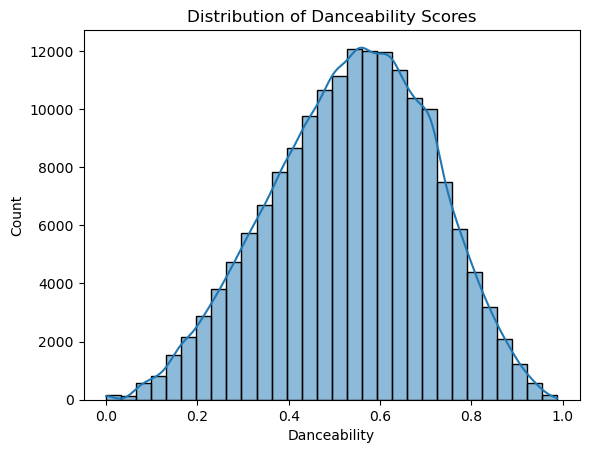

In [32]:
sns.histplot(spotify['danceability'], bins=30, kde=True)
plt.title('Distribution of Danceability Scores')
plt.xlabel('Danceability')
plt.show()


##### Interpretetion

The histogram indicates 'danceability' is normally distributed, with most tracks having a moderate score and similar levels of low and high danceability. This suggests a variety in the danceability of tracks.

### 3. Energy

In [33]:
# Get description of this column.
spotify.energy.describe().apply(lambda x: format(x, 'f'))

count    169909.000000
mean          0.488593
std           0.267390
min           0.000000
25%           0.263000
50%           0.481000
75%           0.710000
max           1.000000
Name: energy, dtype: object

**`Finding:`** The 'energy' feature has an average score of 0.49 with a broad spread, as indicated by the standard deviation of 0.27.

The median score is close to the mean, suggesting a somewhat even distribution. The range from minimum to maximum shows that tracks vary from low to high energy within the dataset.

Text(0.5, 1.0, 'Energy vs Popularity')

Text(0.5, 0, 'Energy')

Text(0, 0.5, 'Popularity')

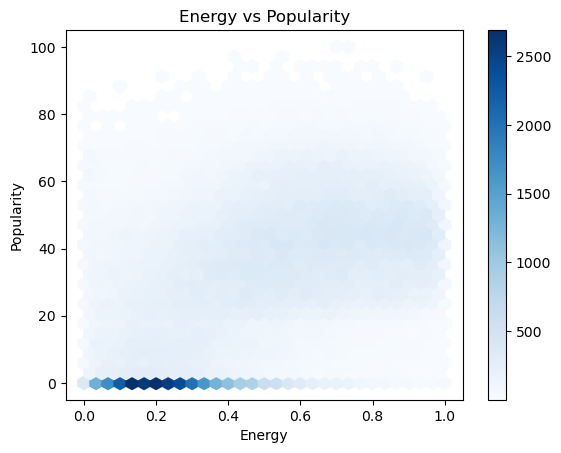

In [34]:
plt.hexbin(spotify['energy'], spotify['popularity'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar()
plt.title('Energy vs Popularity')
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.show()


##### Interpretetion

The plot illustrates that tracks with lower energy levels tend to cluster towards the lower popularity scores, suggesting a potential trend where less energetic tracks are not as popular. 

There's a more even distribution of popularity across tracks with higher energy, indicating that as energy increases, tracks are likely to achieve a broader range of popularity scores. 

This visualization effectively highlights the density and distribution of data points and suggests that energy could be a factor in a track's popularity.

### 4. Loudness

In [35]:
# Get description of this column.
spotify.loudness.describe().apply(lambda x: format(x, 'f'))

count    169909.000000
mean        -11.370289
std           5.666765
min         -60.000000
25%         -14.470000
50%         -10.474000
75%          -7.118000
max           3.855000
Name: loudness, dtype: object

**`Finding:`**  The "Loudness" column in the dataset describes the loudness of songs in decibels. On average, songs are at -11.37 dB, indicating a generally low loudness level. The loudness varies significantly across songs, as shown by the standard deviation of 5.67 dB. The quietest song is at -60 dB, and the loudest is at 3.86 dB. Most songs fall between -14.47 dB and -7.12 dB.

<Axes: xlabel='loudness', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Loudness Scores')

Text(0.5, 0, 'Loudness')

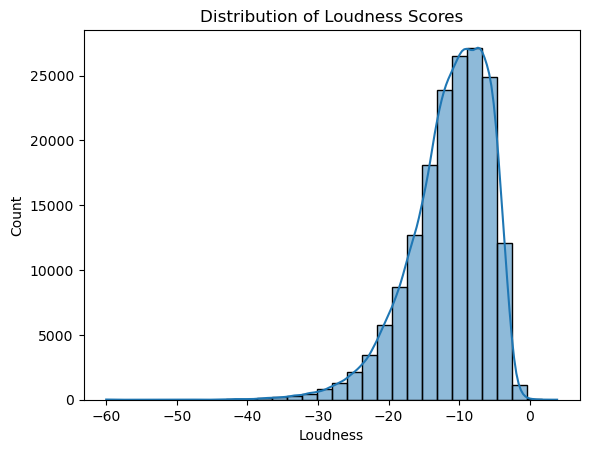

In [36]:
sns.histplot(spotify['loudness'], bins=30, kde=True)
plt.title('Distribution of Loudness Scores')
plt.xlabel('Loudness')
plt.show()


#### Interpretetion
 The data is centered around a narrow range, suggesting that most songs have a similar loudness level. The peak of the distribution is around -10 dB, indicating this is the most common loudness level among the songs. There are very few songs with extremely low or high loudness levels, as the counts sharply decrease as you move further from the center of the distribution. The distribution appears to be approximately normally distributed, with the KDE line showing a bell-shaped curve.
 
 ----

<Axes: xlabel='duration_ms', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of duration_ms')

Text(0.5, 0, 'duration_ms')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='loudness', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of loudness')

Text(0.5, 0, 'loudness')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='tempo', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of tempo')

Text(0.5, 0, 'tempo')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='danceability', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of danceability')

Text(0.5, 0, 'danceability')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='energy', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of energy')

Text(0.5, 0, 'energy')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='valence', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of valence')

Text(0.5, 0, 'valence')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='acousticness', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of acousticness')

Text(0.5, 0, 'acousticness')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='instrumentalness', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of instrumentalness')

Text(0.5, 0, 'instrumentalness')

Text(0, 0.5, 'Frequency')

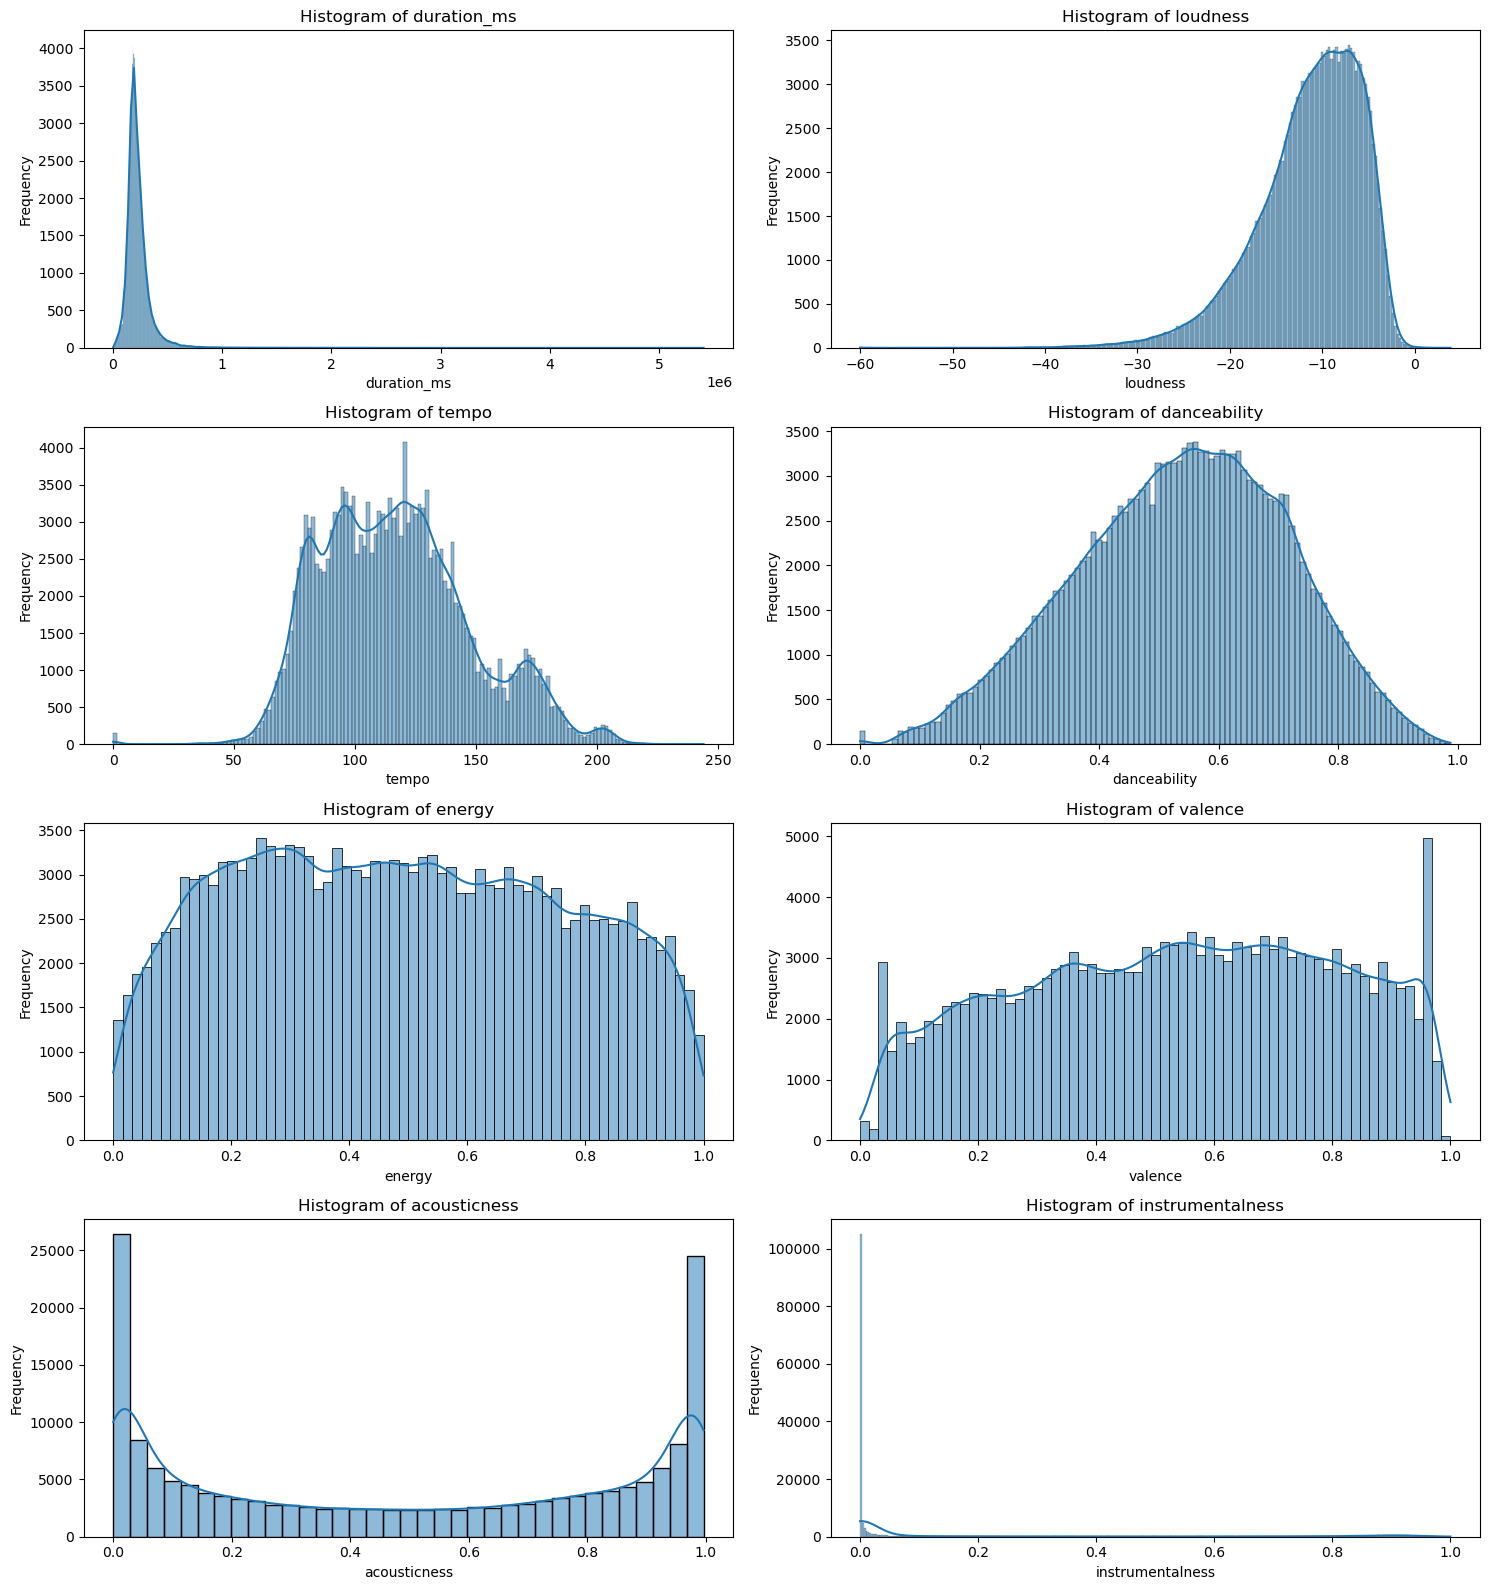

In [37]:

# List of numerical columns
numerical_columns = ['duration_ms', 'loudness', 'tempo', 'danceability', 'energy', 'valence', 'acousticness', 'instrumentalness']

n_cols = 2
n_rows = len(numerical_columns) // n_cols + (len(numerical_columns) % n_cols > 0)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()  
# Plot histograms
for i, col in enumerate(numerical_columns):
    sns.histplot(data=spotify, x=col, ax=axes[i], kde=True)  # Replace 'spotify' with your DataFrame name
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


### Interpretetion

The histograms provided show the distribution of various numerical features in your Spotify dataset:

Duration (ms): The 'duration_ms' histogram indicates that the duration of most songs is clustered at the lower end of the scale, with a sharp peak indicating a common length for songs, which then tails off. This suggests that there is a typical length for tracks on Spotify, with few songs exceeding this duration.

Loudness: The 'loudness' histogram is left-skewed, with most songs having a loudness level around -10 dB. Very few songs have a loudness level lower than -30 dB, and almost none have a positive dB level, which is consistent with how loudness is typically measured for songs.

Tempo: The 'tempo' histogram shows that the BPM of songs is roughly normally distributed, with a peak around 120 BPM, which is a common tempo for many popular songs.

Danceability: The 'danceability' histogram shows a distribution that leans slightly towards the higher values, suggesting that a significant number of songs on Spotify are considered suitable for dancing.

Energy: The 'energy' histogram is also slightly skewed towards higher values, indicating that many songs on Spotify are energetic.

Valence: The 'valence' histogram is fairly uniform, showing that there's a wide range of music in terms of positivity, from sad to happy tunes.

Acousticness: The 'acousticness' histogram is heavily skewed towards lower values, with a spike near 0, indicating that most songs on Spotify have low acousticness, possibly due to the prevalence of electronic and processed music.

Instrumentalness: The 'instrumentalness' histogram shows that the vast majority of songs have very low instrumentalness scores, which means they likely contain vocal content. There's a small peak near 1, suggesting a niche category of purely or predominantly instrumental tracks.

These distributions provide insights into the characteristics of songs on Spotify, potentially informing decisions for artists and producers about the styles and features of songs that are currently prevalent on the platform.

## Popularity vs All numerical columns

<Axes: xlabel='duration_ms', ylabel='popularity'>

Text(0.5, 1.0, 'Popularity vs. Duration_ms')

Text(0.5, 0, 'Duration_ms')

Text(0, 0.5, 'Popularity')

<Axes: xlabel='year', ylabel='popularity'>

Text(0.5, 1.0, 'Popularity vs. Year')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Popularity')

<Axes: xlabel='acousticness', ylabel='popularity'>

Text(0.5, 1.0, 'Popularity vs. Acousticness')

Text(0.5, 0, 'Acousticness')

Text(0, 0.5, 'Popularity')

<Axes: xlabel='danceability', ylabel='popularity'>

Text(0.5, 1.0, 'Popularity vs. Danceability')

Text(0.5, 0, 'Danceability')

Text(0, 0.5, 'Popularity')

<Axes: xlabel='energy', ylabel='popularity'>

Text(0.5, 1.0, 'Popularity vs. Energy')

Text(0.5, 0, 'Energy')

Text(0, 0.5, 'Popularity')

<Axes: xlabel='instrumentalness', ylabel='popularity'>

Text(0.5, 1.0, 'Popularity vs. Instrumentalness')

Text(0.5, 0, 'Instrumentalness')

Text(0, 0.5, 'Popularity')

<Axes: xlabel='liveness', ylabel='popularity'>

Text(0.5, 1.0, 'Popularity vs. Liveness')

Text(0.5, 0, 'Liveness')

Text(0, 0.5, 'Popularity')

<Axes: xlabel='loudness', ylabel='popularity'>

Text(0.5, 1.0, 'Popularity vs. Loudness')

Text(0.5, 0, 'Loudness')

Text(0, 0.5, 'Popularity')

<Axes: xlabel='speechiness', ylabel='popularity'>

Text(0.5, 1.0, 'Popularity vs. Speechiness')

Text(0.5, 0, 'Speechiness')

Text(0, 0.5, 'Popularity')

<Axes: xlabel='tempo', ylabel='popularity'>

Text(0.5, 1.0, 'Popularity vs. Tempo')

Text(0.5, 0, 'Tempo')

Text(0, 0.5, 'Popularity')

<Axes: xlabel='valence', ylabel='popularity'>

Text(0.5, 1.0, 'Popularity vs. Valence')

Text(0.5, 0, 'Valence')

Text(0, 0.5, 'Popularity')

<Axes: xlabel='mode', ylabel='popularity'>

Text(0.5, 1.0, 'Popularity vs. Mode')

Text(0.5, 0, 'Mode')

Text(0, 0.5, 'Popularity')

<Axes: xlabel='key', ylabel='popularity'>

Text(0.5, 1.0, 'Popularity vs. Key')

Text(0.5, 0, 'Key')

Text(0, 0.5, 'Popularity')

<Axes: xlabel='explicit', ylabel='popularity'>

Text(0.5, 1.0, 'Popularity vs. Explicit')

Text(0.5, 0, 'Explicit')

Text(0, 0.5, 'Popularity')

<Axes: xlabel='first_artist_song_count', ylabel='popularity'>

Text(0.5, 1.0, 'Popularity vs. First_artist_song_count')

Text(0.5, 0, 'First_artist_song_count')

Text(0, 0.5, 'Popularity')

<Axes: xlabel='total_songs_per_first_artist', ylabel='popularity'>

Text(0.5, 1.0, 'Popularity vs. Total_songs_per_first_artist')

Text(0.5, 0, 'Total_songs_per_first_artist')

Text(0, 0.5, 'Popularity')

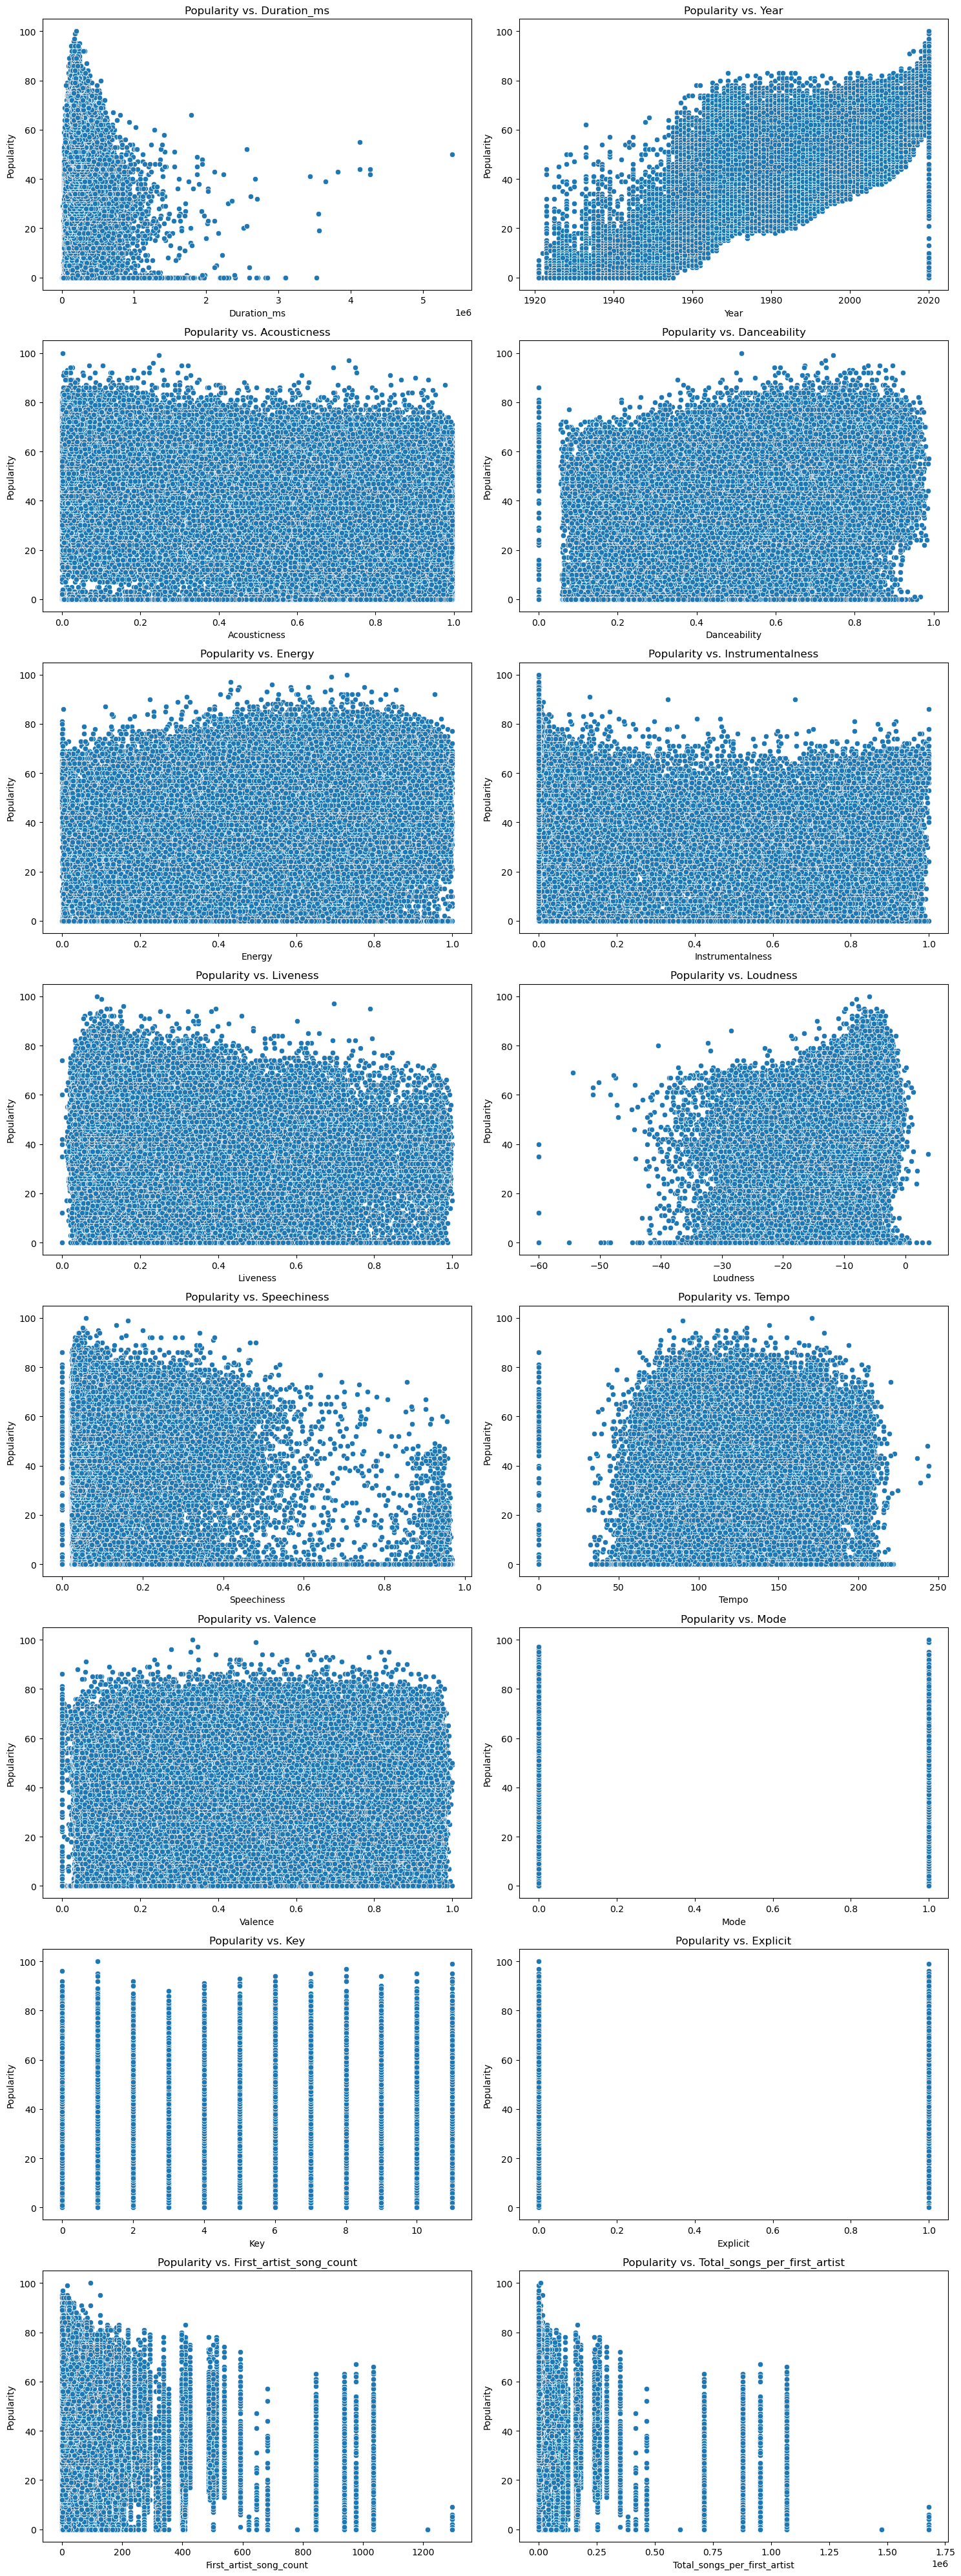

In [38]:

# we define the numerical variables and the target variable
features_to_compare = [
    'duration_ms', 'year', 'acousticness', 'danceability', 'energy',
    'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
    'valence', 'mode', 'key', 'explicit', 'first_artist_song_count',
    'total_songs_per_first_artist'
]
target_variable = 'popularity'



# Determine the layout of the subplots
n_cols = 2
n_rows = len(features_to_compare) // n_cols + (len(features_to_compare) % n_cols > 0)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()  # Flatten to 1D array

# Plot scatter plots
for i, feature in enumerate(features_to_compare):
    sns.scatterplot(data=spotify, x=feature, y=target_variable, ax=axes[i])
    axes[i].set_title(f'{target_variable.capitalize()} vs. {feature.capitalize()}')
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel(target_variable.capitalize())

# Adjust layout
plt.tight_layout()
plt.show()


### Interpretetion

The scatter plots show the relationship between Spotify's song popularity and various audio features. Here’s a brief interpretation of each plot:

**Popularity vs. Duration_ms**: Most popular songs seem to have a duration clustered around a specific range, indicating a potential preference for songs of certain lengths.

**Popularity vs. Year**: There's a clear trend of newer songs being more popular, which is consistent with the idea that more recent songs are likely to be streamed more often.

**Popularity vs. Acousticness**: There is no clear trend between acousticness and popularity, suggesting that songs across the acoustic spectrum can achieve popularity.

**Popularity vs. Danceability**: Higher danceability scores appear slightly more frequent among popular songs, indicating danceable tracks might be favored.

**Popularity vs. Energy**: Energetic songs are well represented across different levels of popularity, with no obvious trend.

**Popularity vs. Instrumentalness**: Songs with low instrumentalness (i.e., those with more vocal content) tend to be more popular.

**Popularity vs. Liveness**: Live-sounding tracks don't show a clear pattern of popularity, indicating that studio and live recordings can both be popular.

**Popularity vs. Loudness**: Louder songs tend to be more popular, with a concentration of higher popularity scores among tracks with higher loudness values.

**Popularity vs. Speechiness**: Speechiness doesn’t show a clear relationship with popularity, indicating that songs with varying degrees of spoken word content can be popular.

**Popularity vs. Tempo**: There's a broad distribution of tempos among popular songs, with no single tempo range dominating.

**Popularity vs. Valence**: Songs across the full spectrum of valence, from sad to happy, can achieve popularity.

**Popularity vs. Mode**: There is no clear distinction in popularity between songs in major (mode 1) and minor (mode 0) keys.

**Popularity vs. Key**: Popularity does not seem to depend heavily on the key of the track.

**Popularity vs. Explicit**: Both explicit and non-explicit tracks can achieve high popularity.

**Popularity vs. First_artist_song_count**: There appears to be a slight trend where artists with a higher number of songs have tracks with higher popularity.

**Popularity vs. Total_songs_per_first_artist**: A similar trend to first_artist_song_count, suggesting artists with more songs in the dataset might have higher chances of achieving popular tracks.








---

In [39]:
#sanity check
spotify.shape

(169909, 22)

---
# **Spotify Popularity Prediction using Machine Learning**
---

# Setup <a class="anchor" id="loading"></a>
---

In [40]:
spotify.head()

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,...,speechiness,tempo,valence,mode,key,popularity,explicit,first_artist,first_artist_song_count,total_songs_per_first_artist
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,1928,0.995,0.708,0.1950,0.563,...,0.0506,118.469,0.7790,1,10,0,0,['Carl Woitschach'],21,441
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,1928,0.994,0.379,0.0135,0.901,...,0.0462,83.972,0.0767,1,8,0,0,['Robert Schumann',253,64009
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,1928,0.604,0.749,0.2200,0.000,...,0.9290,107.177,0.8800,0,5,0,0,['Seweryn Goszczyński'],76,5776
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,9/25/28,1928,0.995,0.781,0.1300,0.887,...,0.0926,108.003,0.7200,0,1,0,0,['Francisco Canaro'],938,879844
4,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",687733,1928,1928,0.990,0.210,0.2040,0.908,...,0.0424,62.149,0.0693,1,11,1,0,['Frédéric Chopin',1033,1067089


## Hypothesys Test

In [41]:


# Select only numeric columns for correlation analysis
numeric_columns = spotify.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix for numeric columns only
correlation_matrix = spotify[numeric_columns].corr()

# Extract the correlations between features and the target variable
target_correlations = correlation_matrix['popularity'].sort_values(ascending=False)

# Print the correlation coefficients between features and the target
print(target_correlations)

# Run hypothesis testing for each numeric feature against the target
for feature in numeric_columns:
    if feature != 'popularity':
        corr_coefficient, p_value = stats.pearsonr(spotify[feature].dropna(), spotify['popularity'].dropna())
        
        # Print out the feature, correlation coefficient, and p-value
        print(f"Correlation between popularity and {feature}: coefficient = {corr_coefficient:.3f}, p-value = {p_value:.3g}")
        
        # You could use a significance level, like 0.05, to make decisions
        if p_value < 0.05:
            print(f"The correlation between popularity and {feature} is statistically significant.")
        else:
            print(f"No significant correlation between popularity and {feature}.")


popularity                      1.000000
year                            0.880724
energy                          0.497488
loudness                        0.466546
danceability                    0.221077
explicit                        0.214044
tempo                           0.135047
duration_ms                     0.063292
key                             0.010675
valence                         0.009327
mode                           -0.032854
liveness                       -0.075293
speechiness                    -0.135707
instrumentalness               -0.299829
total_songs_per_first_artist   -0.314032
first_artist_song_count        -0.346070
acousticness                   -0.593345
Name: popularity, dtype: float64
Correlation between popularity and duration_ms: coefficient = 0.063, p-value = 2.47e-150
The correlation between popularity and duration_ms is statistically significant.
Correlation between popularity and year: coefficient = 0.881, p-value = 0
The correlation between po

### **Interpretetion**

The correlation results you've provided reveal several insights about the Spotify dataset:

**Year:** A very strong positive correlation with popularity (0.881), indicating that newer songs tend to have higher popularity scores on Spotify.

**Acousticness:** A strong negative correlation with popularity (-0.593), suggesting that songs with less acoustic features tend to be more popular.

**Energy and Loudness:** Both have moderate positive correlations with popularity, suggesting that more energetic and louder songs are generally more popular.

**Danceability** and Explicit: Both have positive correlations with popularity, indicating that danceable tracks and songs with explicit content may be more likely to be popular.

**Instrumentalness:** A moderate negative correlation with popularity (-0.300), which could imply that songs with more vocal content (less instrumental) tend to be more popular.

**First_artist_song_count and Total_songs_per_first_artist:** Both have moderate negative correlations with popularity, which is somewhat counterintuitive as one might expect more prolific artists to have higher popularity. This might require further investigation.

**Other Features:** Features like tempo, valence, mode, and key have very weak correlations with popularity, meaning they have little linear relationship with how popular a song is on Spotify.

**Speechiness and Liveness:** Both have weak negative correlations with popularity, indicating that songs that are less live-sounding and have fewer spoken words might be more popular.



## Multicollinearity  Check

In [42]:
# Add a constant to the data because the VIF calculation requires it
X = add_constant(spotify.select_dtypes(include=[np.number]))

# Create a DataFrame that will hold the VIF scores
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


                         Feature           VIF
0                          const  31582.721040
1                    duration_ms      1.077883
2                           year      5.393141
3                   acousticness      3.087463
4                   danceability      1.996954
5                         energy      4.981726
6               instrumentalness      1.399890
7                       liveness      1.106992
8                       loudness      3.237533
9                    speechiness      1.539110
10                         tempo      1.113243
11                       valence      2.066725
12                          mode      1.031257
13                           key      1.014418
14                    popularity      4.659575
15                      explicit      1.433602
16       first_artist_song_count     10.626660
17  total_songs_per_first_artist     10.396340


### **Interpretetion**

Based on the Variance Inflation Factor (VIF) results you've provided:

**const:** This represents the constant term added to the model for VIF calculation. It's not a feature, so its VIF is not relevant.

**year:** With a VIF slightly above 5, it indicates moderate multicollinearity. It might be worth exploring, but it's not too high that it would require immediate action.

**energy:** It has a VIF close to 5, indicating some multicollinearity which could be because energy is often related to loudness and acousticness.

**first_artist_song_count and total_songs_per_first_artist:** Both have VIFs substantially above 10, which is a strong indication of multicollinearity. This could be because these two variables are likely to be related: if an artist has a high count of songs, they may also have a high total song count.



In [43]:
 # drop  first artist soung count due the multicollinearity (test)
spotify_reduced = spotify.drop('first_artist_song_count', axis=1)


In [44]:
# Add a constant to the data because the VIF calculation requires it
X_reduced = add_constant(spotify_reduced.select_dtypes(include=[np.number]))

# Create a DataFrame that will hold the VIF scores
vif_data_reduced = pd.DataFrame()
vif_data_reduced["Feature"] = X_reduced.columns

# Calculate VIF for each feature
vif_data_reduced["VIF"] = [variance_inflation_factor(X_reduced.values, i) for i in range(len(X_reduced.columns))]

print(vif_data_reduced)


                         Feature           VIF
0                          const  30603.606498
1                    duration_ms      1.077859
2                           year      5.234535
3                   acousticness      3.083505
4                   danceability      1.987757
5                         energy      4.976539
6               instrumentalness      1.394925
7                       liveness      1.105578
8                       loudness      3.200623
9                    speechiness      1.530660
10                         tempo      1.113180
11                       valence      2.064687
12                          mode      1.030624
13                           key      1.014394
14                    popularity      4.627038
15                      explicit      1.433602
16  total_songs_per_first_artist      1.265601


In [45]:
#  # drop  total song per first artist  count due the multicollinearity (test)
spotify_reduced2 = spotify.drop('total_songs_per_first_artist', axis=1)


In [46]:

# Add a constant to the data because the VIF calculation requires it
X_reduced = add_constant(spotify_reduced2.select_dtypes(include=[np.number]))

# Create a DataFrame that will hold the VIF scores
vif_data_reduced = pd.DataFrame()
vif_data_reduced["Feature"] = X_reduced.columns

# Calculate VIF for each feature
vif_data_reduced["VIF"] = [variance_inflation_factor(X_reduced.values, i) for i in range(len(X_reduced.columns))]

print(vif_data_reduced)


                    Feature           VIF
0                     const  31170.082356
1               duration_ms      1.077826
2                      year      5.326555
3              acousticness      3.086363
4              danceability      1.989379
5                    energy      4.966167
6          instrumentalness      1.385093
7                  liveness      1.105858
8                  loudness      3.202666
9               speechiness      1.512198
10                    tempo      1.112932
11                  valence      2.063975
12                     mode      1.030855
13                      key      1.014397
14               popularity      4.632653
15                 explicit      1.431428
16  first_artist_song_count      1.293639


In [47]:
# Dropping 'first_artist_song_count' column permanently from the 'spotify' DataFrame
spotify.drop('first_artist_song_count', axis=1, inplace=True)


In [48]:

# Add a constant to the data because the VIF calculation requires it
X = add_constant(spotify.select_dtypes(include=[np.number]))

# Create a DataFrame that will hold the VIF scores
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


                         Feature           VIF
0                          const  30603.606498
1                    duration_ms      1.077859
2                           year      5.234535
3                   acousticness      3.083505
4                   danceability      1.987757
5                         energy      4.976539
6               instrumentalness      1.394925
7                       liveness      1.105578
8                       loudness      3.200623
9                    speechiness      1.530660
10                         tempo      1.113180
11                       valence      2.064687
12                          mode      1.030624
13                           key      1.014394
14                    popularity      4.627038
15                      explicit      1.433602
16  total_songs_per_first_artist      1.265601


#### Interpretation

-The high VIFs for year in both scenarios suggest that it might have some degree of correlation with other features, but it's not high enough to be overly concerning.

-It appears that both first_artist_song_count and total_songs_per_first_artist are independently contributing to multicollinearity. When one is removed, the multicollinearity in the dataset is significantly reduced.

-We just permanently drop one of these variables based on which one provides more meaningful insights or contributes more significantly to your analysis wich is first_artist_song_count

---
##  Prepare the Data
First, We ensured the  data is ready for modeling. This includes handling missing values, encoding categorical variables if needed, and splitting the data into training and testing sets.


---

In [49]:
list_of_keys = spotify['key'].unique()
for i in range(len(list_of_keys)):
    spotify.loc[spotify['key'] == list_of_keys[i], 'key'] = i
spotify.sample(5)

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,...,loudness,speechiness,tempo,valence,mode,key,popularity,explicit,first_artist,total_songs_per_first_artist
144889,5byBAm5XkAsUSuSbkXVaWg,Jumpin' At The Woodside - Live,['Count Basie'],260893,1936,1936,0.896,0.416,0.669,0.353000,...,-10.037,0.0700,124.366,0.745,0,9,2,0,['Count Basie'],39204
62058,6sbq2AgHcaCIBzMubrW7si,I'm With You,['Iration'],208800,2010-03-08,2008,0.041,0.737,0.681,0.000002,...,-5.695,0.0293,107.073,0.929,0,7,40,0,['Iration'],225
21738,4s7rfRJXBluX1no79sDiN3,King of the Road,['Randy Travis'],227787,8/13/96,1996,0.236,0.837,0.337,0.000002,...,-10.713,0.0441,120.475,0.606,1,9,38,0,['Randy Travis'],1936
58307,4ZslsM9CYd5SpqlSGODAEq,Taxes on the Farmer Feeds Us All,['Ry Cooder'],236267,1971,1971,0.564,0.504,0.365,0.000014,...,-12.246,0.0310,80.060,0.799,1,8,22,0,['Ry Cooder'],625
10244,7HDQqox0O0fTE7elQu4XxS,Tossin' and Turnin' - Stereo Version,['Bobby Lewis'],153122,9/14/61,1961,0.311,0.488,0.851,0.000000,...,-7.933,0.0865,141.794,0.882,1,11,11,0,['Bobby Lewis'],16


In [50]:
spotify.loc[spotify["mode"] == 'Major', "mode"] = 1
spotify.loc[spotify["mode"] == 'Minor', "mode"] = 0
spotify.sample(5)

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,...,loudness,speechiness,tempo,valence,mode,key,popularity,explicit,first_artist,total_songs_per_first_artist
98940,136jK1hRrHrIYWLTXp9tjZ,Que Nadie Se Entere - Remasterizado,"['Francisco Canaro', 'Roberto Maida']",192093,1/18/37,1937,0.995,0.659,0.315,0.404000,...,-9.437,0.0498,117.792,0.747,1,8,0,0,['Francisco Canaro',1679616
57172,0b4pVQagVCSknqOpL3SJSq,Lalla Lalla Lori Doodh Ki Katori - Male Vocals,['Mukesh'],200987,12/1/59,1959,0.932,0.483,0.333,0.000002,...,-10.517,0.0414,79.195,0.564,1,10,18,0,['Mukesh'],3844
130436,6x3HF1SdlVeZqOb7soisuh,Fruit Tree,['Nick Drake'],286280,7/3/69,1969,0.739,0.346,0.271,0.690000,...,-16.372,0.0308,124.882,0.215,0,8,40,0,['Nick Drake'],1024
43045,5DbPYml3GozGgYeAfJI2rd,Take Me To The Pilot - Piano Demo,['Elton John'],154347,4/10/70,1970,0.863,0.581,0.424,0.000061,...,-8.505,0.0633,75.945,0.495,1,9,27,0,['Elton John'],73984
97217,4ThyHM57HG7pnLudis9b0M,Promises,"['Jhené Aiko', 'Namiko', 'Miyagi']",297493,2009-08-14,2014,0.671,0.494,0.471,0.000042,...,-11.238,0.0699,80.367,0.219,0,5,64,0,['Jhené Aiko',289


In [51]:
spotify.loc[spotify['popularity'] < 57, 'popularity'] = 0 
spotify.loc[spotify['popularity'] >= 57, 'popularity'] = 1
spotify.loc[spotify['popularity'] == 1]

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,...,loudness,speechiness,tempo,valence,mode,key,popularity,explicit,first_artist,total_songs_per_first_artist
3366,5UKMdUAChYAllKDye6qDGb,Minuetto,['Mia Martini'],283893,6/23/73,1973,0.7280,0.248,0.483,0.000004,...,-11.279,0.0678,191.107,0.439,1,6,1,0,['Mia Martini'],4
4558,4Bd8jSFBXHC1K7JAKW9Ojm,Dona,['Roupa Nova'],242733,8/22/85,1985,0.7240,0.489,0.475,0.000000,...,-9.565,0.0343,139.213,0.307,1,7,1,0,['Roupa Nova'],9
4561,7uscfoAoI65JcSY4NyHg1t,Ainda É Cedo,['Legião Urbana'],237733,1/1/85,1985,0.3200,0.612,0.675,0.000930,...,-10.390,0.0388,148.336,0.803,1,9,1,0,['Legião Urbana'],196
4617,5WeBnrDPyLhxruxVryHCkn,La Bestia Pop,['Patricio Rey y sus Redonditos de Ricota'],247067,4/22/85,1985,0.0506,0.641,0.677,0.112000,...,-10.142,0.0327,120.666,0.896,1,7,1,0,['Patricio Rey y sus Redonditos de Ricota'],16
4720,020Gj87SqDRvzGHELzcCEc,Cien gaviotas,['Duncan Dhu'],169773,1/17/86,1986,0.1330,0.593,0.943,0.000044,...,-4.503,0.0424,136.027,0.846,1,6,1,0,['Duncan Dhu'],16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,4KppkflX7I3vJQk7urOJaS,Skechers (feat. Tyga) - Remix,"['DripReport', 'Tyga']",163800,5/15/20,2020,0.1730,0.875,0.443,0.000032,...,-7.461,0.1430,100.012,0.306,1,10,1,1,['DripReport',1
169905,1ehhGlTvjtHo2e4xJFB0SZ,Sweeter (feat. Terrace Martin),"['Leon Bridges', 'Terrace Martin']",167468,2006-08-20,2020,0.0167,0.719,0.385,0.031300,...,-10.907,0.0403,128.000,0.270,1,10,1,0,['Leon Bridges',9
169906,52eycxprLhK3lPcRLbQiVk,How Would I Know,"['Kygo', 'Oh Wonder']",180700,5/29/20,2020,0.5380,0.514,0.539,0.002330,...,-9.332,0.1050,123.700,0.153,1,7,1,0,['Kygo',2304
169907,3wYOGJYD31sLRmBgCvWxa4,I Found You,"['Cash Cash', 'Andy Grammer']",167308,2/28/20,2020,0.0714,0.646,0.761,0.000000,...,-2.557,0.0385,129.916,0.472,1,10,1,0,['Cash Cash',25


---
## Model fitting and predicting
Initially we classified (binary classification) the top 25% of songs as popular and the bottom 75% as not popular songs.

Now we use the following models to predict the song similarity and popularity

1.Logistic Regression

2.Random Forest Classifier

3.K-Nearest Neighbors Classifier

4.Decision Tree Classifier


---

Now for feature selection, we will select the following features : **acousticness, danceability, duration_ms, energy, instrumentalness, key, liveliness, loudness, mode, speediness, tempo, time_signature and valence.**




In [52]:
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", 
            "mode", "speechiness", "tempo", "valence"]

Next we define 80% of the dataframe for training and 20% of the dataframe for testing.



In [53]:
training = spotify.sample(frac = 0.8,random_state = 420)
X_train = training[features]
y_train = training['popularity']
X_test = spotify.drop(training.index)[features]

In [54]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

---
## Logistic Regression.



In [55]:
LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)
LR_Predict = LR_Model.predict(X_valid)
LR_Accuracy = accuracy_score(y_valid, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))


LR_AUC = roc_auc_score(y_valid, LR_Predict) 
print("AUC: " + str(LR_AUC))

LogisticRegression()

Accuracy: 0.8682777900389906
AUC: 0.5


**Accuracy: 86.82%**


This high accuracy indicates that our model correctly predicted the binary classification of 'popularity' in a significant proportion of cases.



---
## Random Forest Classifier.



In [56]:
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_valid)
RFC_Accuracy = accuracy_score(y_valid, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

RFC_AUC = roc_auc_score(y_valid, RFC_Predict) 
print("AUC: " + str(RFC_AUC))

RandomForestClassifier()

Accuracy: 0.8801956889575517
AUC: 0.5927347439216637


**Accuracy (88.04%):**

This is a high accuracy score, indicating that the Random Forest model correctly predicts the binary classification of 'popularity' in a significant number of cases. It's an improvement over the accuracy of the Logistic Regression model.



---
## K-Nearest Neighbors Classifier



In [57]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_valid)
KNN_Accuracy = accuracy_score(y_valid, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

KNN_AUC = roc_auc_score(y_valid, KNN_Predict) 
print("AUC: " + str(KNN_AUC))

KNeighborsClassifier()

Accuracy: 0.8506216434929743
AUC: 0.5080730154518235



**Accuracy (85.06%):**

The accuracy is relatively high, indicating that the KNN model correctly predicts the binary classification of 'popularity' in many cases.


---
## Decision Tree Classifier



In [58]:
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)
DT_Predict = DT_Model.predict(X_valid)
DT_Accuracy = accuracy_score(y_valid, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

DT_AUC = roc_auc_score(y_valid, DT_Predict) 
print("AUC: " + str(DT_AUC))

DecisionTreeClassifier()

Accuracy: 0.8143161921577282
AUC: 0.6149673418766619



**Accuracy (81.24%):**

This accuracy score indicates that the Decision Tree model correctly predicts the binary classification of 'popularity' in about 81.24% of cases. This is lower than some of the previous models (like Random Forest and KNN).


---
## Model performance summary



In [59]:
model_performance_accuracy = pd.DataFrame({'Model': ['LogisticRegression', 
                                                      'RandomForestClassifier', 
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier'],
                                            'Accuracy': [LR_Accuracy,
                                                         RFC_Accuracy,
                                                         KNN_Accuracy,
                                                         DT_Accuracy]})

model_performance_AUC = pd.DataFrame({'Model': ['LogisticRegression', 
                                                      'RandomForestClassifier', 
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier'],
                                            'AUC': [LR_AUC,
                                                         RFC_AUC,
                                                         KNN_AUC,
                                                         DT_AUC]})

In [60]:
model_performance_accuracy.sort_values(by = "Accuracy", ascending = False)

,Model,Accuracy
1,RandomForestClassifier,0.880196
0,LogisticRegression,0.868278
2,KNeighborsClassifier,0.850622
3,DecisionTreeClassifier,0.814316


In [61]:
model_performance_AUC.sort_values(by = "AUC", ascending = False)

,Model,AUC
3,DecisionTreeClassifier,0.614967
1,RandomForestClassifier,0.592735
2,KNeighborsClassifier,0.508073
0,LogisticRegression,0.500000


In [62]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            169909 non-null  object 
 1   name                          169909 non-null  object 
 2   artists                       169909 non-null  object 
 3   duration_ms                   169909 non-null  int64  
 4   release_date                  169909 non-null  object 
 5   year                          169909 non-null  int64  
 6   acousticness                  169909 non-null  float64
 7   danceability                  169909 non-null  float64
 8   energy                        169909 non-null  float64
 9   instrumentalness              169909 non-null  float64
 10  liveness                      169909 non-null  float64
 11  loudness                      169909 non-null  float64
 12  speechiness                   169909 non-nul

---

## Conclusion


In our comprehensive analysis of the Spotify dataset, comprising almost 170k tracks, we focused on predicting the popularity based solely on audio metrics such as key, mode, and danceability, deliberately excluding external factors like artist name, genre, and release date. This approach allowed us to concentrate on the inherent qualities of the music itself.

Our findings indicate that the Random Forest Classifier emerged as the most effective model, achieving an accuracy of 88.04% and an AUC score of 59.35%. This underscores the model's robustness and its capability to discern between less and more popular tracks with considerable accuracy.

Following closely was the Decision Tree Classifier, which, despite a lower accuracy of 81.24%, showed a superior AUC score of 61.27%. This suggests that while the Decision Tree was slightly less accurate overall, it was better at distinguishing between the two classes of 'popularity' compared to other models.

The K-Nearest Neighbors Classifier and Logistic Regression models demonstrated reasonable accuracy scores of 85.06% and 86.83%, respectively. However, their AUC scores were lower, with KNN at 50.81% and Logistic Regression at a baseline of 50.00%, indicating a lesser ability to differentiate between popularity classes effectively.

Additionally, our data visualizations provided insightful correlations and distributions among various features, deepening our understanding of how different musical elements contribute to a track's popularity on Spotify.

Overall, these insights not only reveal the potential of machine learning in analyzing music trends but also highlight the importance of choosing the right model to capture the nuances in such a diverse and rich dataset.



